## Question 2

Download the file iris.data at: http://archive.ics.uci.edu/ml/machine-learning-databases/iris

The dataset contains a set of 150 records of three species of irises, under five attributes: petal length, petal width, sepal length, sepal width and species (for further detail, see: iris.name). Treat this as a 4-dimensional data set, using the species column as labels. In this data set, the data is labeled. The procedure remains the same: Repeat the analyses carried out above on the iris data set. Identify the number of misclassified data points after applying your analysis. Once you have the groups
finalized, compute the mean and std. deviation for each of the four variables of only one of your groups (specify the group in your solution). Finally, identify the mis-classified points (i.e. use the labels to see if the groups are homogeneous)

In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
# read in data from data4.txt
data = open('iris.data', 'r')

# initiate x & y coordinate lists
points = []

# loop through the file, split the lines into x & y coordinates
for line in data:
    coord = line.split(',')
    points.append([float(coord[0]), float(coord[1]), float(coord[2]), float(coord[3]), coord[4]])

# close the file
data.close()

In [3]:
# assign the different centre points, these are the first point of each group of flower
centres = [points[0], points[50], points[100]]

In [4]:
def get_dists(points, centres):
    '''
    Calculates the distance between each data point and each centre
    
    --Inputs--
    points: n by 2 list of the data points, each list item contains a list with the point's x and y values
    centres: 4 by 2 list of the centre points, each list item contains a list with the centre's x and y values
    
    --Output--
    dists: 4 by n list of distances, there is one distance for each point for each centre, organized by centre.
    '''
    # instantiate the list of lists for the distances
    dists = [[],[],[]]
    #instantiate our "mini distance" which is the sum of all the distance dimensions
    mini_dist = 0
    
    # calculate all the distances
    # for every point, measure the distance from all 3 centre points
    for i in range(len(points)):
        for j in range(len(dists)):
            #reset the mini distance for the new point
            mini_dist = 0
            #minus 1 for the point length so we don't include the label string
            for k in range(len(points[i]) - 1):
                # the formula for determining distance is (point(d) - centre(d))^2 for every dimension d we have, in this case 4
                # these distances get added to the centre distance list corresponding to the centre we are measuring the distance from
                mini_dist += ((points[i][k] - centres[j][k]) ** 2)
            
            dists[j].append(mini_dist)
    
    return dists

def get_groups(points, dists, centres, RSSs):
    '''
    Assigns each data point to the group closest centre also calculates the residual sums of squares
    
    --Inputs--
    points: n by 5 list of the data points, each list item contains a list with the point's four dimensions and label
    dists: 3 by n list of distances, there is one distance for each point for each centre, organized by centre
    centres: 3 by 5 list of the centre points, each list item contains a list with the centre's 4 dimensions and label
    RSSs: 3 by l list of residual sums of squares The width of the list is determined by 
          the number of iterations the program has done
    
    --Output--
    groups: 3 by m by 5 list of groups, there are 4 groups containing m points (likely different for each group)
            each point list contains the point's measurements and label
    RSSs: 3 by l list of residual sums of squares The width of the list is determined by 
          the number of iterations the program has done 
    '''
    # instantiate the list of 3 lists for the groups
    groups = [[],[],[]]
    # instatiate the RSSks list
    RSSks = []
    
    # assign the points to the different groups based on the shortest distance
    for i in range(len(points) - 1):
        
        # find the minimum of each distance list
        minimum = min(dists[0][i], dists[1][i], dists[2][i])
        # find the index of the minimum, this index corresponds to the closest centre
        index = [dists[0][i], dists[1][i], dists[2][i]].index(minimum)
        # use the index to add the point to the group corresponding to the closest centre
        groups[index].append(points[i])
    
    #calculate the residual sums of squares for each group and add to the RSS list 
    for j in range(len(groups)):
        RSSk_sum = 0
        
        #adding the distances each point is from the (x distance squared plus y distance squared) together for each group
        for k in range(len(groups[j])):
            #minus 1 for the point length so we don't include the label string
            for l in range(len(groups[j][k]) - 1):
                # the formula for determining distance is (point(d) - centre(d))^2 for every dimension d we have, in this case 4
                RSSk_sum += (groups[j][k][l] - centres[j][l]) ** 2

        RSSks.append(RSSk_sum)

    RSSs.append(RSSks)
    
    return groups, RSSs

def get_centres(groups, centres):
    '''
    Calculate the average x and y values of each group, assign those those averages as the new centres for each group
    
    --Inputs--
    groups: 3 by m by 5 list of groups, there are 4 groups containing m points (likely different for each group)
            each point list contains the point's measurements and label
    centres: 3 by 5 list of the centre points, each list item contains a list with the centre's 4 dimensions and label
    
    --Output--
    avg_dist: the average distance between the old centres and the new centres
    centres: the NEW 3 by 5 list of the centre points, calculated by the average x and y value of each group
    '''  
    # create a new copy of the centres
    old_centres = centres.copy()
    # create the sum of distances between the old and new centres
    sum_dist = 0

    # find the average value of the 4 dimension of every point in each group
    for i in range(len(groups)):
        
        w_sum = 0
        x_sum = 0
        y_sum = 0
        z_sum = 0
    
        for j in range(len(groups[i])):

            w_sum += groups[i][j][0]
            x_sum += groups[i][j][1]
            y_sum += groups[i][j][2]
            z_sum += groups[i][j][3]

        # these averages of each group become the new corresponding centre point
        centres[i] = [w_sum / len(groups[i]), x_sum / len(groups[i]), y_sum / len(groups[i]), z_sum / len(groups[i])]      
    
    # calculate the distance between the old centre and the new centre and take the average
    # once this value gets low enough we'll stop the program
    for k in range(len(centres)):
        for l in range(len(centres[i])):
            sum_dist += (old_centres[k][l] - centres[k][l]) ** 2
    
    avg_dist = sum_dist / len(centres)
    
    return avg_dist, centres

def plot_RSS(RSSs):
    '''
    plots the Residual Sum of Squares (RSS) for each group over the program's run
    also prints the total sum of the group RSSs 
    --Input--
    RSSs: 3 by l list of residual sums of squares The width of the list is determined by 
          the number of iterations the program has done
    --Output--
    none
    '''
    
    #change the RSS to a numpy array so we can use more of it's functionality in the plotting
    RSS = np.asarray(RSSs)
    
    #the x values in this graph will be from 1 to the amount of moves
    x = np.linspace(1,len(RSSs), num=len(RSSs))
    fig3, ax3 = plt.subplots()
    colors = ['blue', 'green', 'purple']
    
    #plotting all the points in one go
    for i in range(len(RSS[0])):
        ax3.plot(x, RSS[:,i:(i+1)], c = colors[i])
    
    #adding a legend to represent each flower group
    ax3.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
    #add the grid and show the graph
    ax3.grid()        
    plt.show()
    
    #add all the RSSs together and print the final sum
    RSS_sum = 0
    
    RSS_sum += sum(RSS[len(RSS) - 1])
    
    print('The final RSS of this data is {0:.6}'.format(RSS_sum))

def clusters(centres, points, tolerance):
    '''
    more or less the main function, this function calls all the other functions to do the analysis. also displays the 
    graph of the RSSs over each iteration
    
    --Inputs--
    points: n by 5 list of the data points, each list item contains a list with the point's four dimensions and label
    centres: 3 by 5 list of the centre points, each list item contains a list with the centre's 4 dimensions and label
    tolerance: the minimum threshold for the difference between the old centres and the new centres
    
    --Output--
    groups: 3 by m by 5 list of groups, there are 4 groups containing m points (likely different for each group)
            each point list contains the point's measurements and label
    
    '''
    #instantiate the list of residual sums of squares
    RSSs = []
    #instantiate an average centre distance
    cent_dist = 100
    
    #keep the program running while the centres are still finding their best place
    while cent_dist > tolerance:
        #get the distance lists
        dists = get_dists(points, centres)
        #get the groups and RSSs
        groups, RSSs = get_groups(points, dists, centres, RSSs)
        #get the average centre distance and the new centres
        cent_dist, centres = get_centres(groups, centres)
    #plot the RSSs
    plot_RSS(RSSs) 
    
    return groups

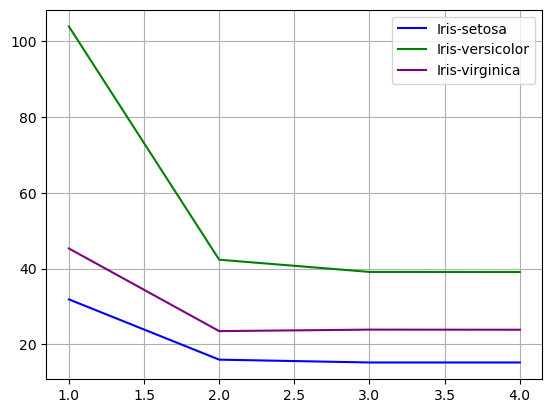

The final RSS of this data is 78.233


In [5]:
#call the clusters function
groups = clusters(centres, points, 10 ** -8)

In [6]:
def count_matches(groups):
    '''
    Counts the amount of each group is the correct label and prints the amount of misgrouped points
    --Input--
    groups: 3 by m by 5 list of groups, there are 4 groups containing m points (likely different for each group)
            each point list contains the point's measurements and label
    --Output--
    none
    '''
    misses = [0,0,0]
    misclassified_points = []
    
    labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    
    for i in range(len(groups)):
        for j in range(len(groups[i])):
            if labels[i] not in groups[i][j][4]:
                misses[i] += 1
                misclassified_points.append(groups[i][j])

    print("Misses in group 1: {0} \nMisses in group 2: {1} \nMisses in group 3: {2} \n".format(misses[0], misses[1], misses[2]))

#call count matches function
count_matches(groups)

Misses in group 1: 0 
Misses in group 2: 13 
Misses in group 3: 2 



In [7]:
def get_stats(groups):
    '''
    calculates the standard deviation and mean for one group 
    --Input--
    groups: 3 by m by 5 list of groups, there are 4 groups containing m points (likely different for each group)
            each point list contains the point's measurements and label
    --Output--
    none
    '''
    #create the group list that we will turn into an array
    group_array = []
    
    #my long way of creating a new list for group 1 with none of the label strings
    for i in range(len(groups[0])):
        point_array = []
        for j in range(4):
            point_array.append(groups[0][i][j])
        group_array.append(point_array)

    #transform the list into an array
    group_array = np.array(group_array)
    
    #print the mean and standard deviation
    means = np.mean(group_array,axis=0)
    std = np.std(group_array,axis=0)

    print("Iris setosa \nPetal length mean: {0:.5}, std. deviation {1:.3} \nPetal width mean: {2:.5}, std. deviation {3:.3} \nSepal length mean: {4:.5}, std. deviation {5:.3} \nSepal width mean: {6:.5}, std. deviation {7:.3}"
          .format(means[0], std[0], means[1], std[1], means[2], std[2], means[3], std[3]))
#call get stats function
get_stats(groups)

Iris setosa 
Petal length mean: 5.006, std. deviation 0.349 
Petal width mean: 3.418, std. deviation 0.377 
Sepal length mean: 1.464, std. deviation 0.172 
Sepal width mean: 0.244, std. deviation 0.106
